In [4]:
import numpy as np
import glob
import os
import pathlib
import re

import scipy
import nilearn
from scipy import stats
from nilearn.image import resample_to_img, math_img
from nilearn import image
from nilearn import plotting
import argparse
from nilearn.image import new_img_like
import matplotlib.pyplot as plt


In [3]:
beta_dir =  '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv05_singletrialnpy'
suballLv = np.load(os.path.join(beta_dir, f"sub-avg_ses-avg_run-avg_event-stimulus_stimintensity-low.npy"))
suballHv = np.load(os.path.join(beta_dir, f"sub-avg_ses-avg_run-avg_event-stimulus_stimintensity-high.npy"))

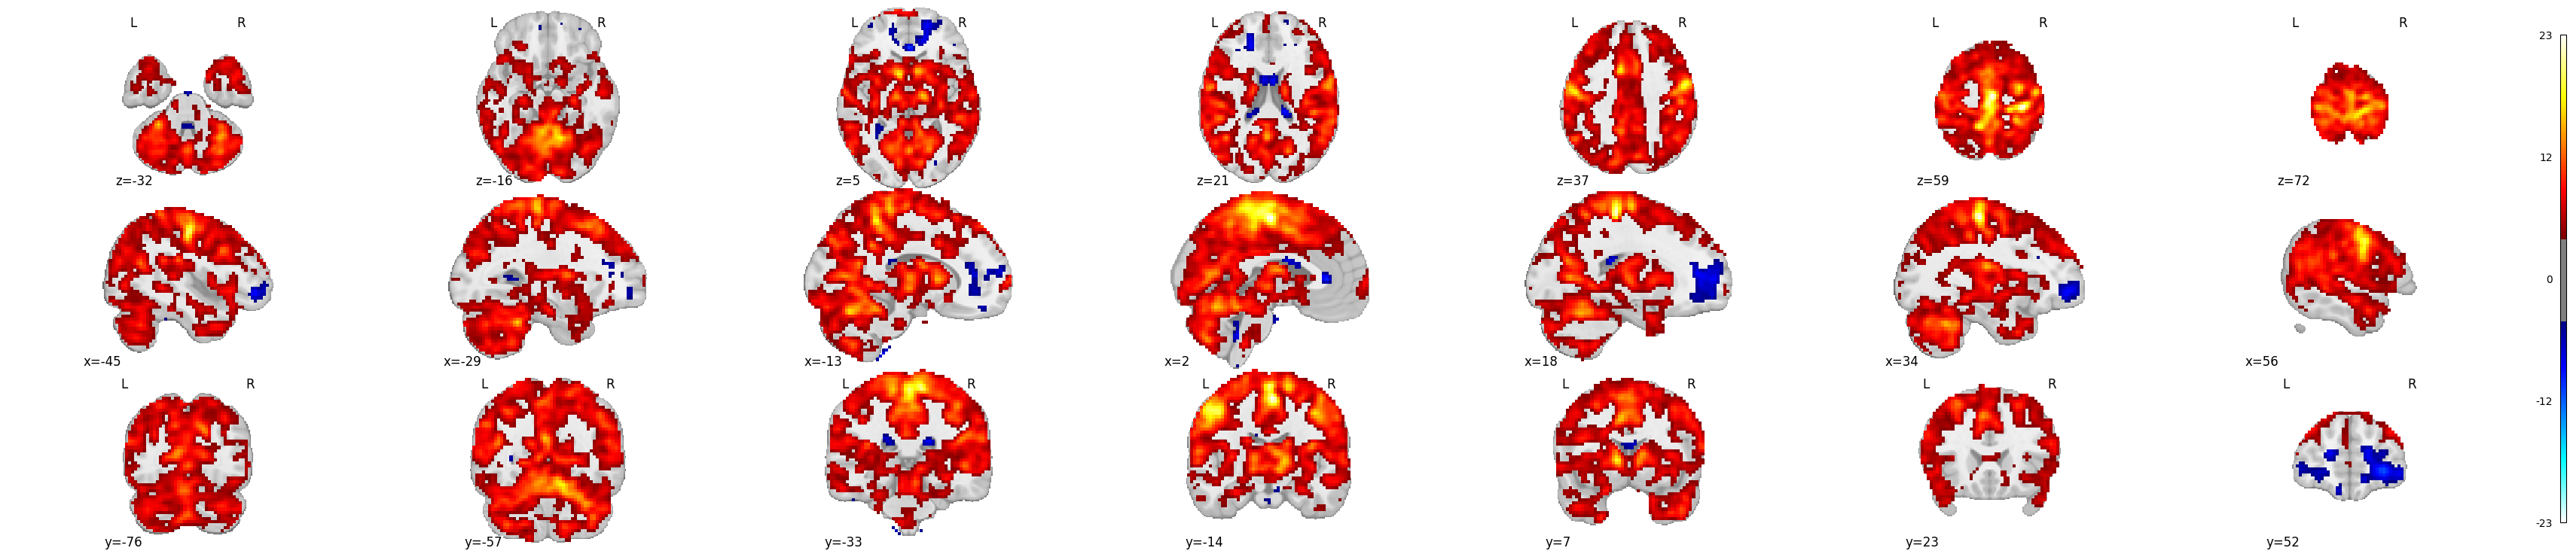

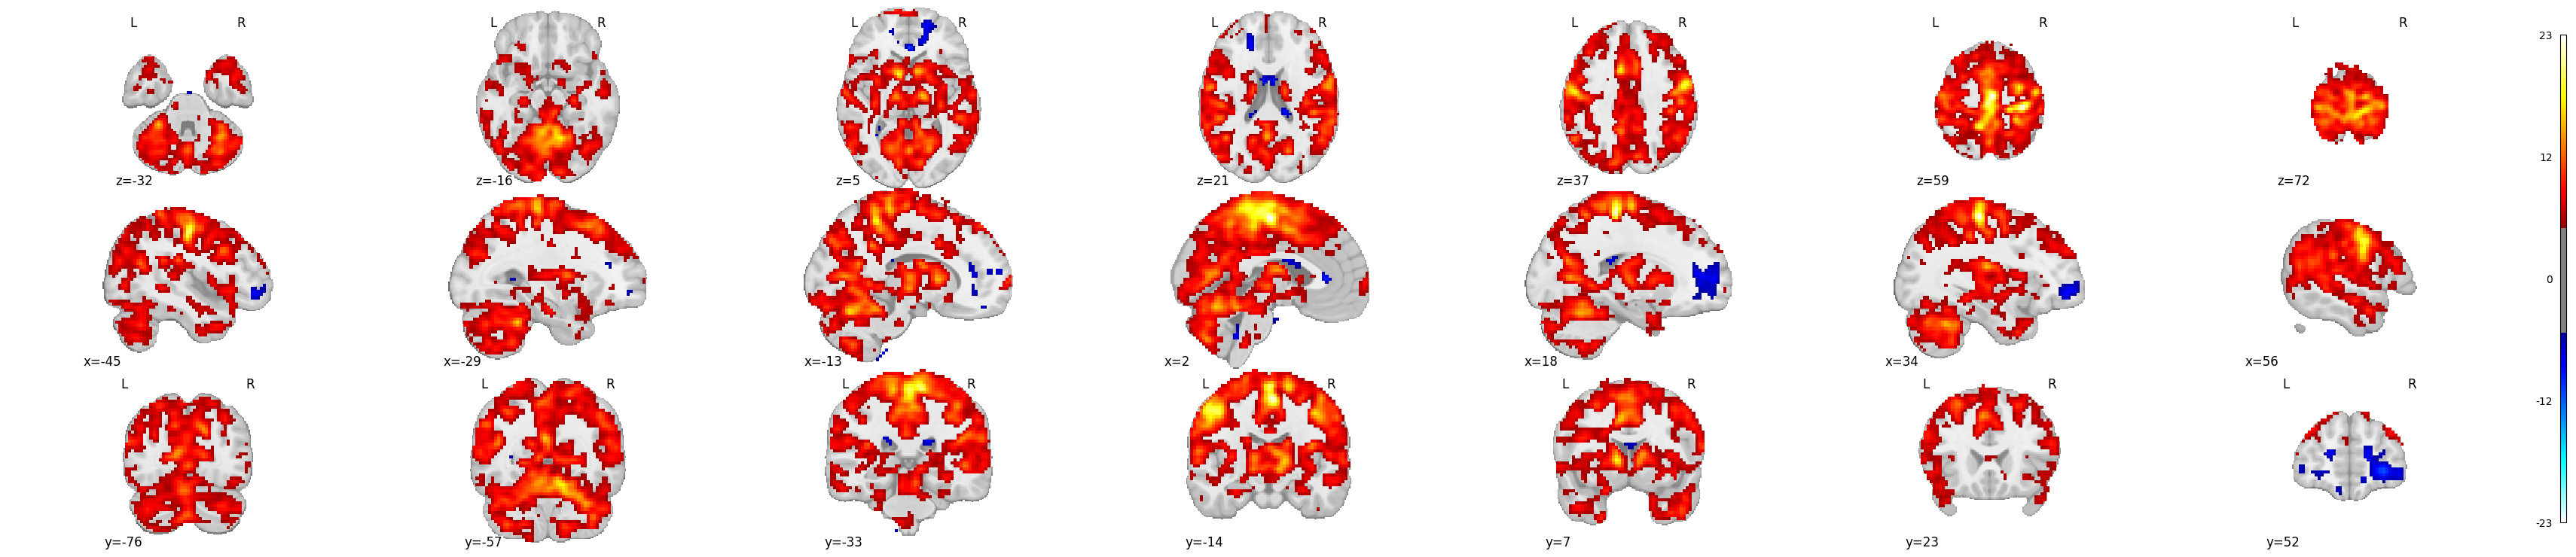

In [9]:
contrast = scipy.stats.ttest_ind(suballHv, suballLv,
                                     axis = 0, nan_policy = 'propagate',alternative='two-sided' )
imgfname = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/sub-0060/sub-0060_ses-01_run-05_runtype-vicarious_event-stimulus_trial-011_cuetype-low_stimintensity-low.nii.gz'
ref_img = image.load_img(imgfname)
statmap = contrast.statistic.reshape(ref_img.shape)
pval = contrast.pvalue.reshape(ref_img.shape)
indices = np.where(pval < 0.001)
selected_t_values = statmap[indices]
# %% canlab mask
mask = image.load_img('/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii')
mask_img = nilearn.masking.compute_epi_mask(mask, target_affine = ref_img.affine, target_shape = ref_img.shape)
stat_img = image.smooth_img(new_img_like(ref_img, statmap), fwhm = 6)
maskedstatmap = nilearn.masking.apply_mask( stat_img, mask_img)
masked_stat_img = image.math_img('img1 * img2', img1=stat_img, img2=mask_img)

plotting.plot_stat_map(masked_stat_img, threshold = 4, display_mode = 'mosaic')
# image.smooth_img(image.load_img(stimL_flist), fwhm = 6))
# %%
# just plot the high stim
# suballHv

high_img = new_img_like(ref_img, np.mean(suballHv, axis = 0).reshape(ref_img.shape))
masked_high_img = image.math_img('img1 * img2', img1=high_img, img2=mask_img)

plotting.plot_stat_map(masked_stat_img, threshold = 5, display_mode = 'mosaic')
